In [2]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
filename = "/home/clevyfidel/Documents/Workspace/goin/opt_coin/output/inference_results_logpm_corr_512.pkl"

with open(filename, 'rb') as f:
    data = pickle.load(f)

In [4]:
data # As a reminder, "small" ran with 2 samples, 5 timepoints, for each of the 8 configs

{0: {'gamma_t': np.float64(0.1),
  'alpha_t': np.float64(0.1),
  'rho_t': np.float64(0.1),
  'ctx_count': 3,
  'Python': {'time': 64.32439487775167,
   'logp_y_avg': array([0.7070199 , 0.80206485, 0.77651367, 0.79148898, 0.80790785,
          0.78367197, 0.70550202, 0.77097457, 0.75394945, 0.73533415,
          0.81073835, 0.73664916, 0.76265645, 0.76517717, 0.77370234,
          0.77329961, 0.80602866, 0.65580849, 0.80409509, 0.80129879,
          0.76712487, 0.79413011, 0.77616713, 0.79636856, 0.75730311,
          0.74997986, 0.79060299, 0.77377729, 0.75079519, 0.81383842,
          0.74868467, 0.75759068, 0.76321663, 0.7722419 , 0.81655035,
          0.75840114, 0.75116007, 0.82187495, 0.79863395, 0.75925853,
          0.77580966, 0.75470951, 0.13302609, 0.61695067, 0.81610667,
          0.69816185, 0.73713105, 0.86880081, 0.79523438, 0.75179709,
          0.76789375, 0.78032558, 0.75840199, 0.72071445, 0.77130872,
          0.78870802, 0.10384756, 0.7813929 , 0.77966707, 0.7436255

In [5]:
data.keys()# should print 27 diff

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [6]:
data[0].keys()

dict_keys(['gamma_t', 'alpha_t', 'rho_t', 'ctx_count', 'Python', 'Leaky', 'Matlab'])

In [7]:
df_logpy = []
df_logpc = [] 
df_time = [] 

for id_config in data.keys():
    df_logpy_partial = pd.DataFrame.from_dict({'python': data[id_config]['Python']['logp_y_avg'],
                               'matlab': data[id_config]['Matlab']['logp_y_avg'],
                               'leaky': data[id_config]['Leaky']['logp_y_avg']})
    df_logpy_partial['config'] = id_config
    df_logpy.append(df_logpy_partial)
    
    # df_time_partial = pd.DataFrame.from_dict({'python': data[id_config]['Python']['time'],
    #                            'matlab': data[id_config]['Matlab']['time'],
    #                            'leaky': data[id_config]['Leaky']['time']})
    
    df_logpc_partial = pd.DataFrame.from_dict({'python': data[id_config]['Python']['logp_c_avg'],
                               'matlab': data[id_config]['Matlab']['logp_c_avg'],
                               'leaky': data[id_config]['Leaky']['logp_c_avg']})
    df_logpc_partial['config'] = id_config
    df_logpc.append(df_logpc_partial)

df_logpy = pd.concat(df_logpy, ignore_index=True)
df_logpc = pd.concat(df_logpc, ignore_index=True)


In [8]:
df_logpy.describe()

python        matlab         leaky        config
count  13824.000000  13824.000000  1.382400e+04  13824.000000
mean       0.352776      0.354970 -6.921666e+03     13.000000
std        0.827168      0.820067  5.130124e+05      7.789163
min      -24.253713    -23.577208 -5.799722e+07      0.000000
25%        0.234003      0.237390 -1.001802e+01      6.000000
50%        0.704633      0.708102 -1.457081e+00     13.000000
75%        0.767120      0.769246  2.820122e-01     20.000000
max        0.876611      0.881002  7.171429e-01     26.000000

In [9]:
df_logpc.describe()

/home/clevyfidel/anaconda3/envs/coin/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/clevyfidel/anaconda3/envs/coin/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/clevyfidel/anaconda3/envs/coin/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


python        matlab         leaky        config
count  1.382400e+04  1.382400e+04  1.382400e+04  13824.000000
mean           -inf          -inf          -inf     13.000000
std             NaN           NaN           NaN      7.789163
min            -inf          -inf          -inf      0.000000
25%   -3.070906e+00 -2.856626e+00 -2.198853e+00      6.000000
50%   -1.738402e-01 -1.798064e-01 -6.625204e-01     13.000000
75%   -2.052226e-03 -2.424146e-03 -9.723375e-02     20.000000
max   -9.488589e-05 -9.108409e-05 -2.187447e-02     26.000000

In [10]:
df_logpc[np.isfinite(df_logpc)].min()

python   -10.211988
matlab   -10.117020
leaky     -9.129247
config     0.000000
dtype: float64

In [11]:
df_logpc[np.isfinite(df_logpc)].max()

python    -0.000095
matlab    -0.000091
leaky     -0.021874
config    26.000000
dtype: float64

In [12]:
df_logpc.groupby('config').agg([('inf_val_count', lambda x: (~np.isfinite(x)).sum())]) # reminder: 512 values per config

python        matlab         leaky
       inf_val_count inf_val_count inf_val_count
config                                          
0                  0             0             0
1                 11            13             0
2                 72            65             0
3                  0             1             1
4                 36            36             0
5                213           209             0
6                  1             1             0
7                 51            46             1
8                293           277             0
9                  1             2             2
10                 5             6             1
11                38            25             1
12                 0             1             0
13                48            35             0
14               233           221             0
15                 0             0             0
16                64            55             3
17               297           289             0
18                 0             0             0
19                 4             5             0
20                25            20             0
21                 2             2             0
22                26            20             1
23               210           187             0
24                 2             2             1
25                46            38             0
26               343           323             1

In [13]:
# # Logp y (observations)
# krows = 3
# fig, axs = plt.subplots(krows, len(data.keys())//krows, figsize=(15, 10))
# for i in range(len(data.keys())):
#     sns.histplot(data=data[i]['Python']['logp_y_avg'], ax=axs.flatten()[i], kde=True)
#     sns.histplot(data=data[i]['Matlab']['logp_y_avg'], ax=axs.flatten()[i], kde=True)
#     sns.histplot(data=data[i]['Leaky']['logp_y_avg'], ax=axs.flatten()[i], kde=True)
#     # axs.flatten()[i].hist(data[i]['Python']['logp_y_avg'])
#     # axs.flatten()[i].hist(data[i]['Matlab']['logp_y_avg'])
#     # axs.flatten()[i].hist(data[i]['Leaky']['logp_y_avg'])

In [14]:
df_logpy_ = df_logpy.melt(id_vars='config', value_vars=['python', 'matlab', 'leaky'], var_name='model', value_name='logpy')

In [15]:
df_logpc_ = df_logpc.melt(id_vars='config', value_vars=['python', 'matlab', 'leaky'], var_name='model', value_name='logpc')

<Axes: xlabel='logpy', ylabel='Count'>

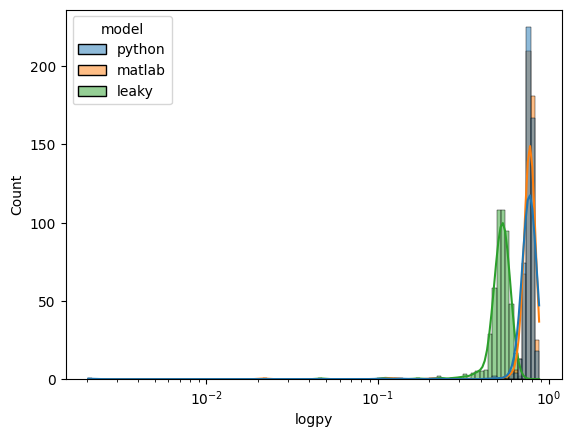

In [16]:
sns.histplot(df_logpy_[df_logpy_['config']==0], x='logpy', hue='model', kde=True, log_scale=True)

<Axes: xlabel='logpy'>

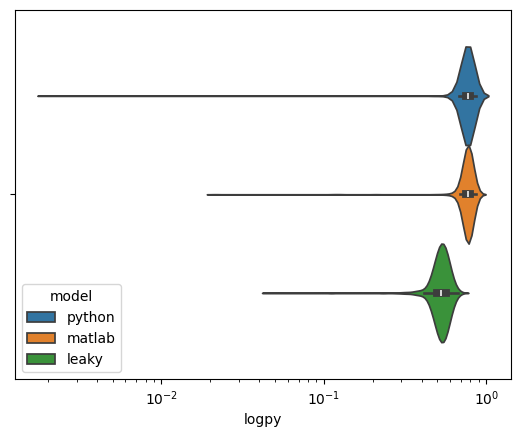

In [27]:
sns.violinplot(df_logpy_[df_logpy_['config']==0], x='logpy', hue='model', log_scale=True)

In [29]:
df_logpy[df_logpy['config']==8].describe()

python      matlab         leaky  config
count  512.000000  512.000000  5.120000e+02   512.0
mean    -1.579099   -1.591468 -8.871235e+03     8.0
std      0.759335    0.740378  1.968728e+05     0.0
min     -9.938814   -9.757798 -4.454294e+06     8.0
25%     -1.731361   -1.751418 -3.652913e+00     8.0
50%     -1.459242   -1.458889 -2.448914e+00     8.0
75%     -1.205650   -1.220498 -1.811753e+00     8.0
max     -0.484342   -0.465246 -8.611479e-01     8.0

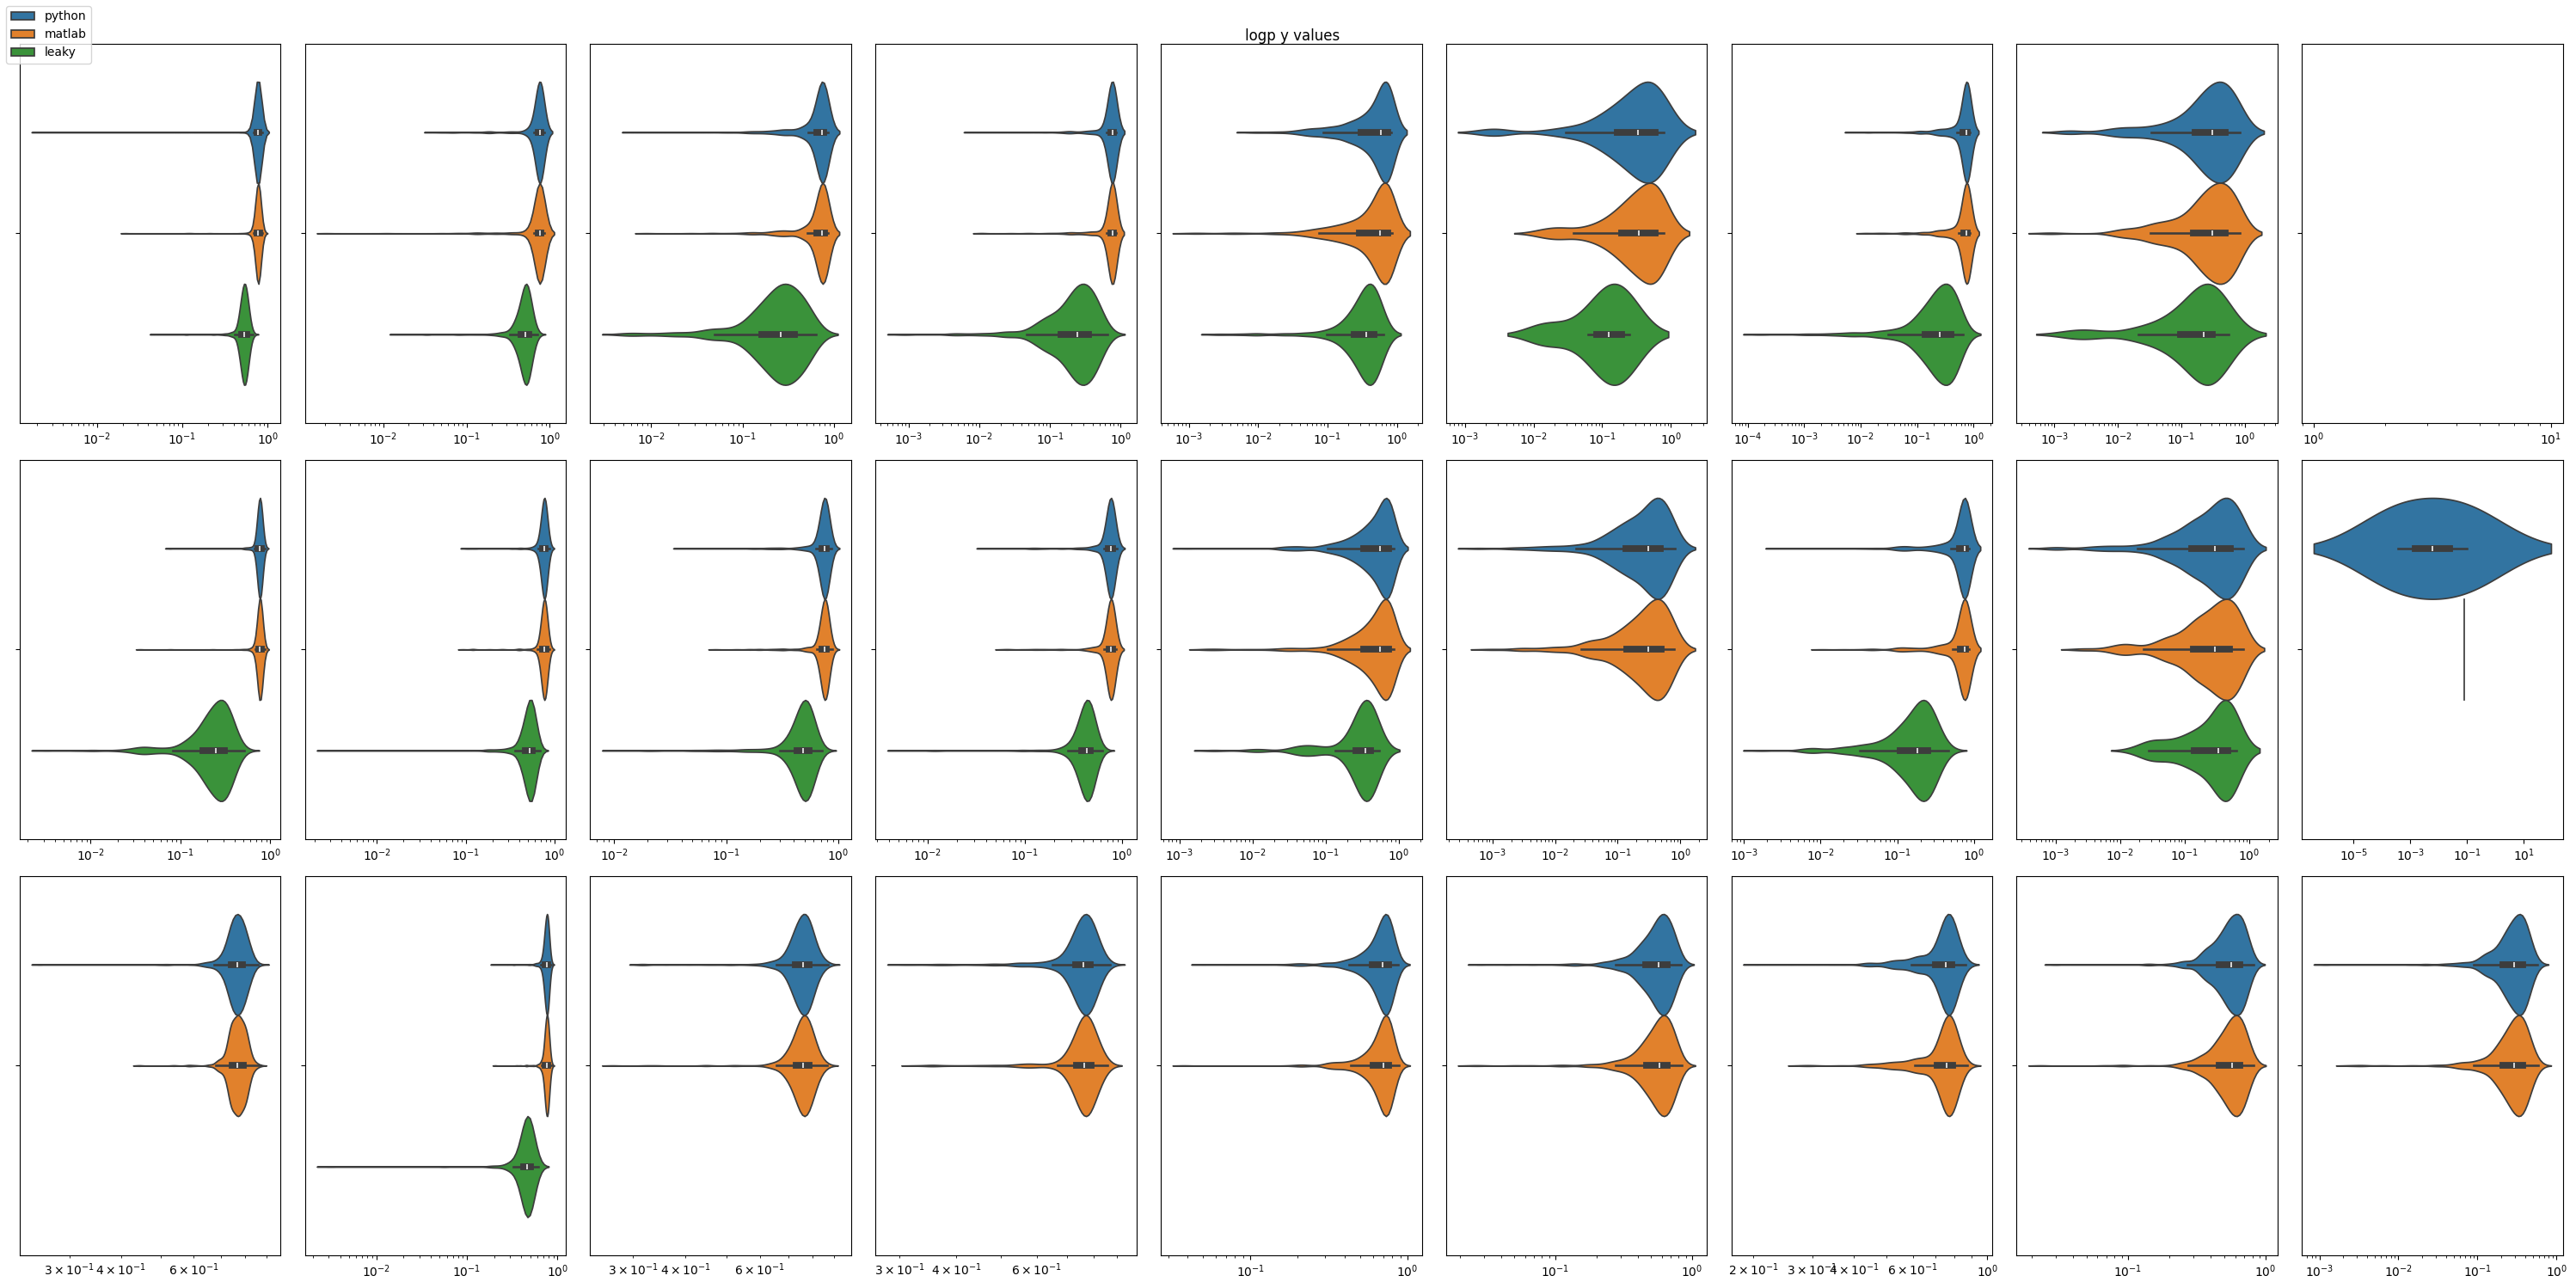

In [22]:
# Logp y (observations)
krows = 3
fig, axs = plt.subplots(krows, len(data.keys())//krows, figsize=(30, 15))
for i in range(len(df_logpy_.config.unique())):
    # sns.histplot(data=df_logpy_[df_logpy_['config']==i], x='logpy', ax=axs.flatten()[i], kde=True, hue='model')
    sns.violinplot(data=df_logpy_[df_logpy_['config']==i], x='logpy', ax=axs.flatten()[i], hue='model', log_scale=True)
    if i == 0: 
        handles, labels = axs.flatten()[i].get_legend_handles_labels()
        axs.flatten()[i].get_legend().remove()
        fig.legend(handles, labels, loc='upper left')
    else: axs.flatten()[i].get_legend().remove()
    axs.flatten()[i].set_xlabel('')
fig.suptitle('logp y values')
plt.tight_layout()


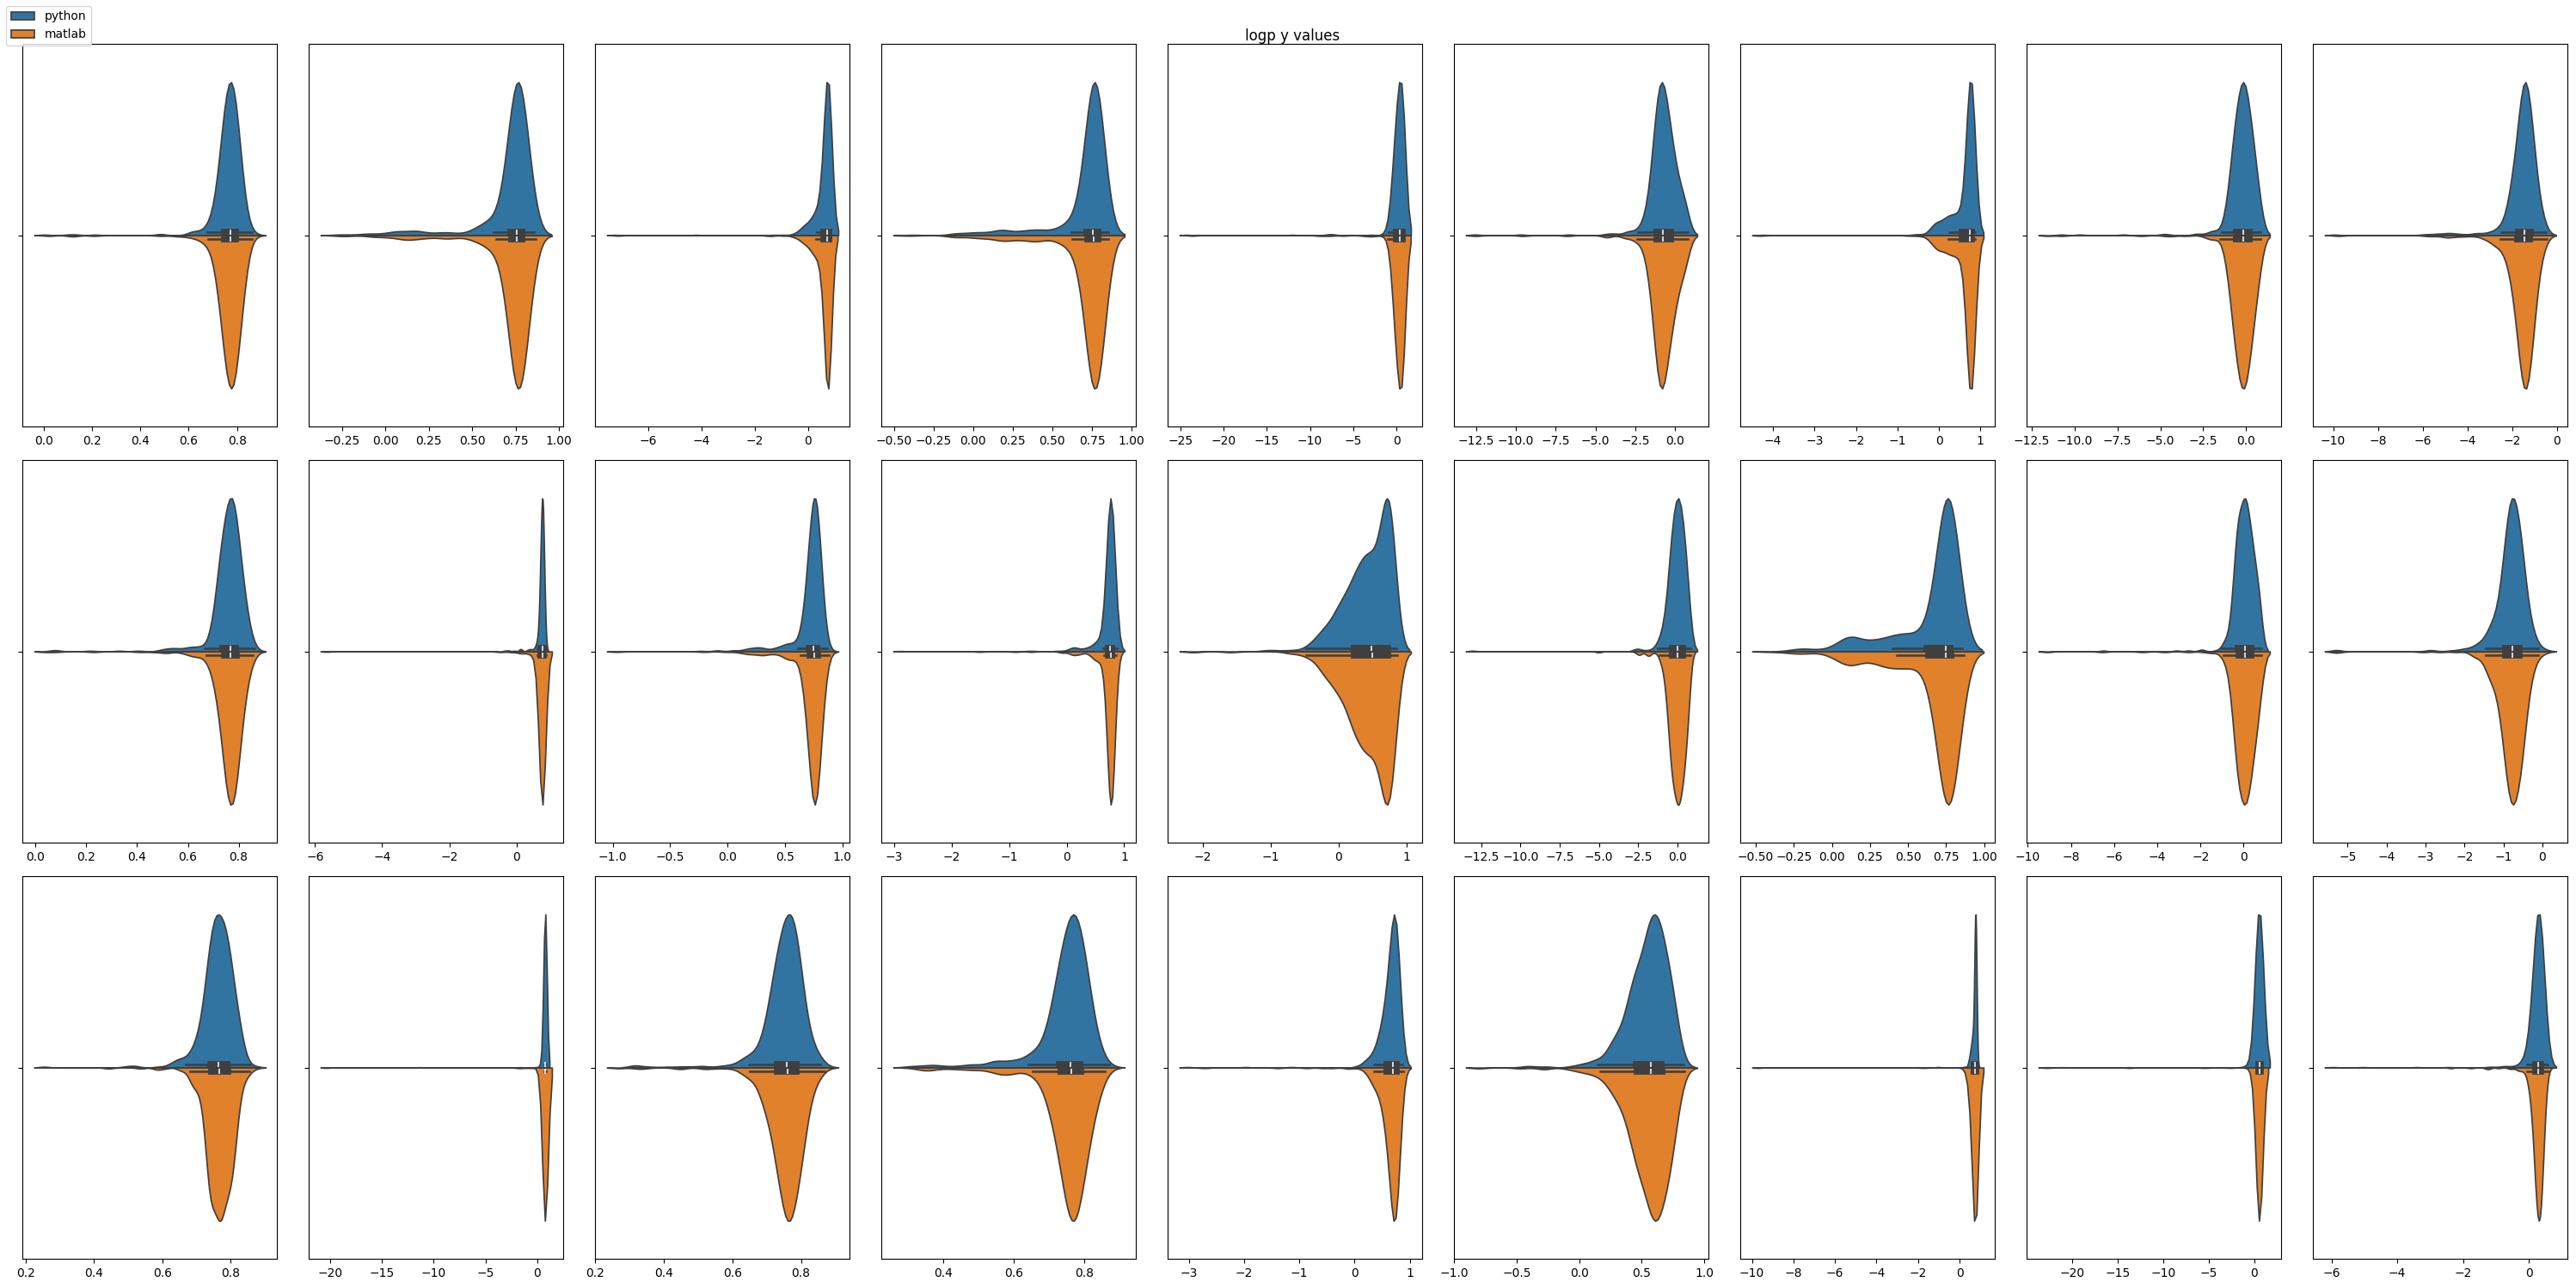

In [23]:
# Logp y (observations) -- COIN model only

df_logpy_coin = df_logpy_.drop(df_logpy_[df_logpy_['model']=='leaky'].index)
krows = 3
fig, axs = plt.subplots(krows, len(data.keys())//krows, figsize=(30, 15))
for i in range(len(df_logpy_.config.unique())):
    # sns.histplot(data=df_logpy_[df_logpy_['config']==i], x='logpy', ax=axs.flatten()[i], kde=True, hue='model')
    sns.violinplot(data=df_logpy_coin[df_logpy_coin['config']==i], x='logpy', ax=axs.flatten()[i], hue='model', log_scale=False, split=True)
    if i == 0: 
        handles, labels = axs.flatten()[i].get_legend_handles_labels()
        axs.flatten()[i].get_legend().remove()
        fig.legend(handles, labels, loc='upper left')
    else: axs.flatten()[i].get_legend().remove()
    axs.flatten()[i].set_xlabel('')
fig.suptitle('logp y values')
plt.tight_layout()

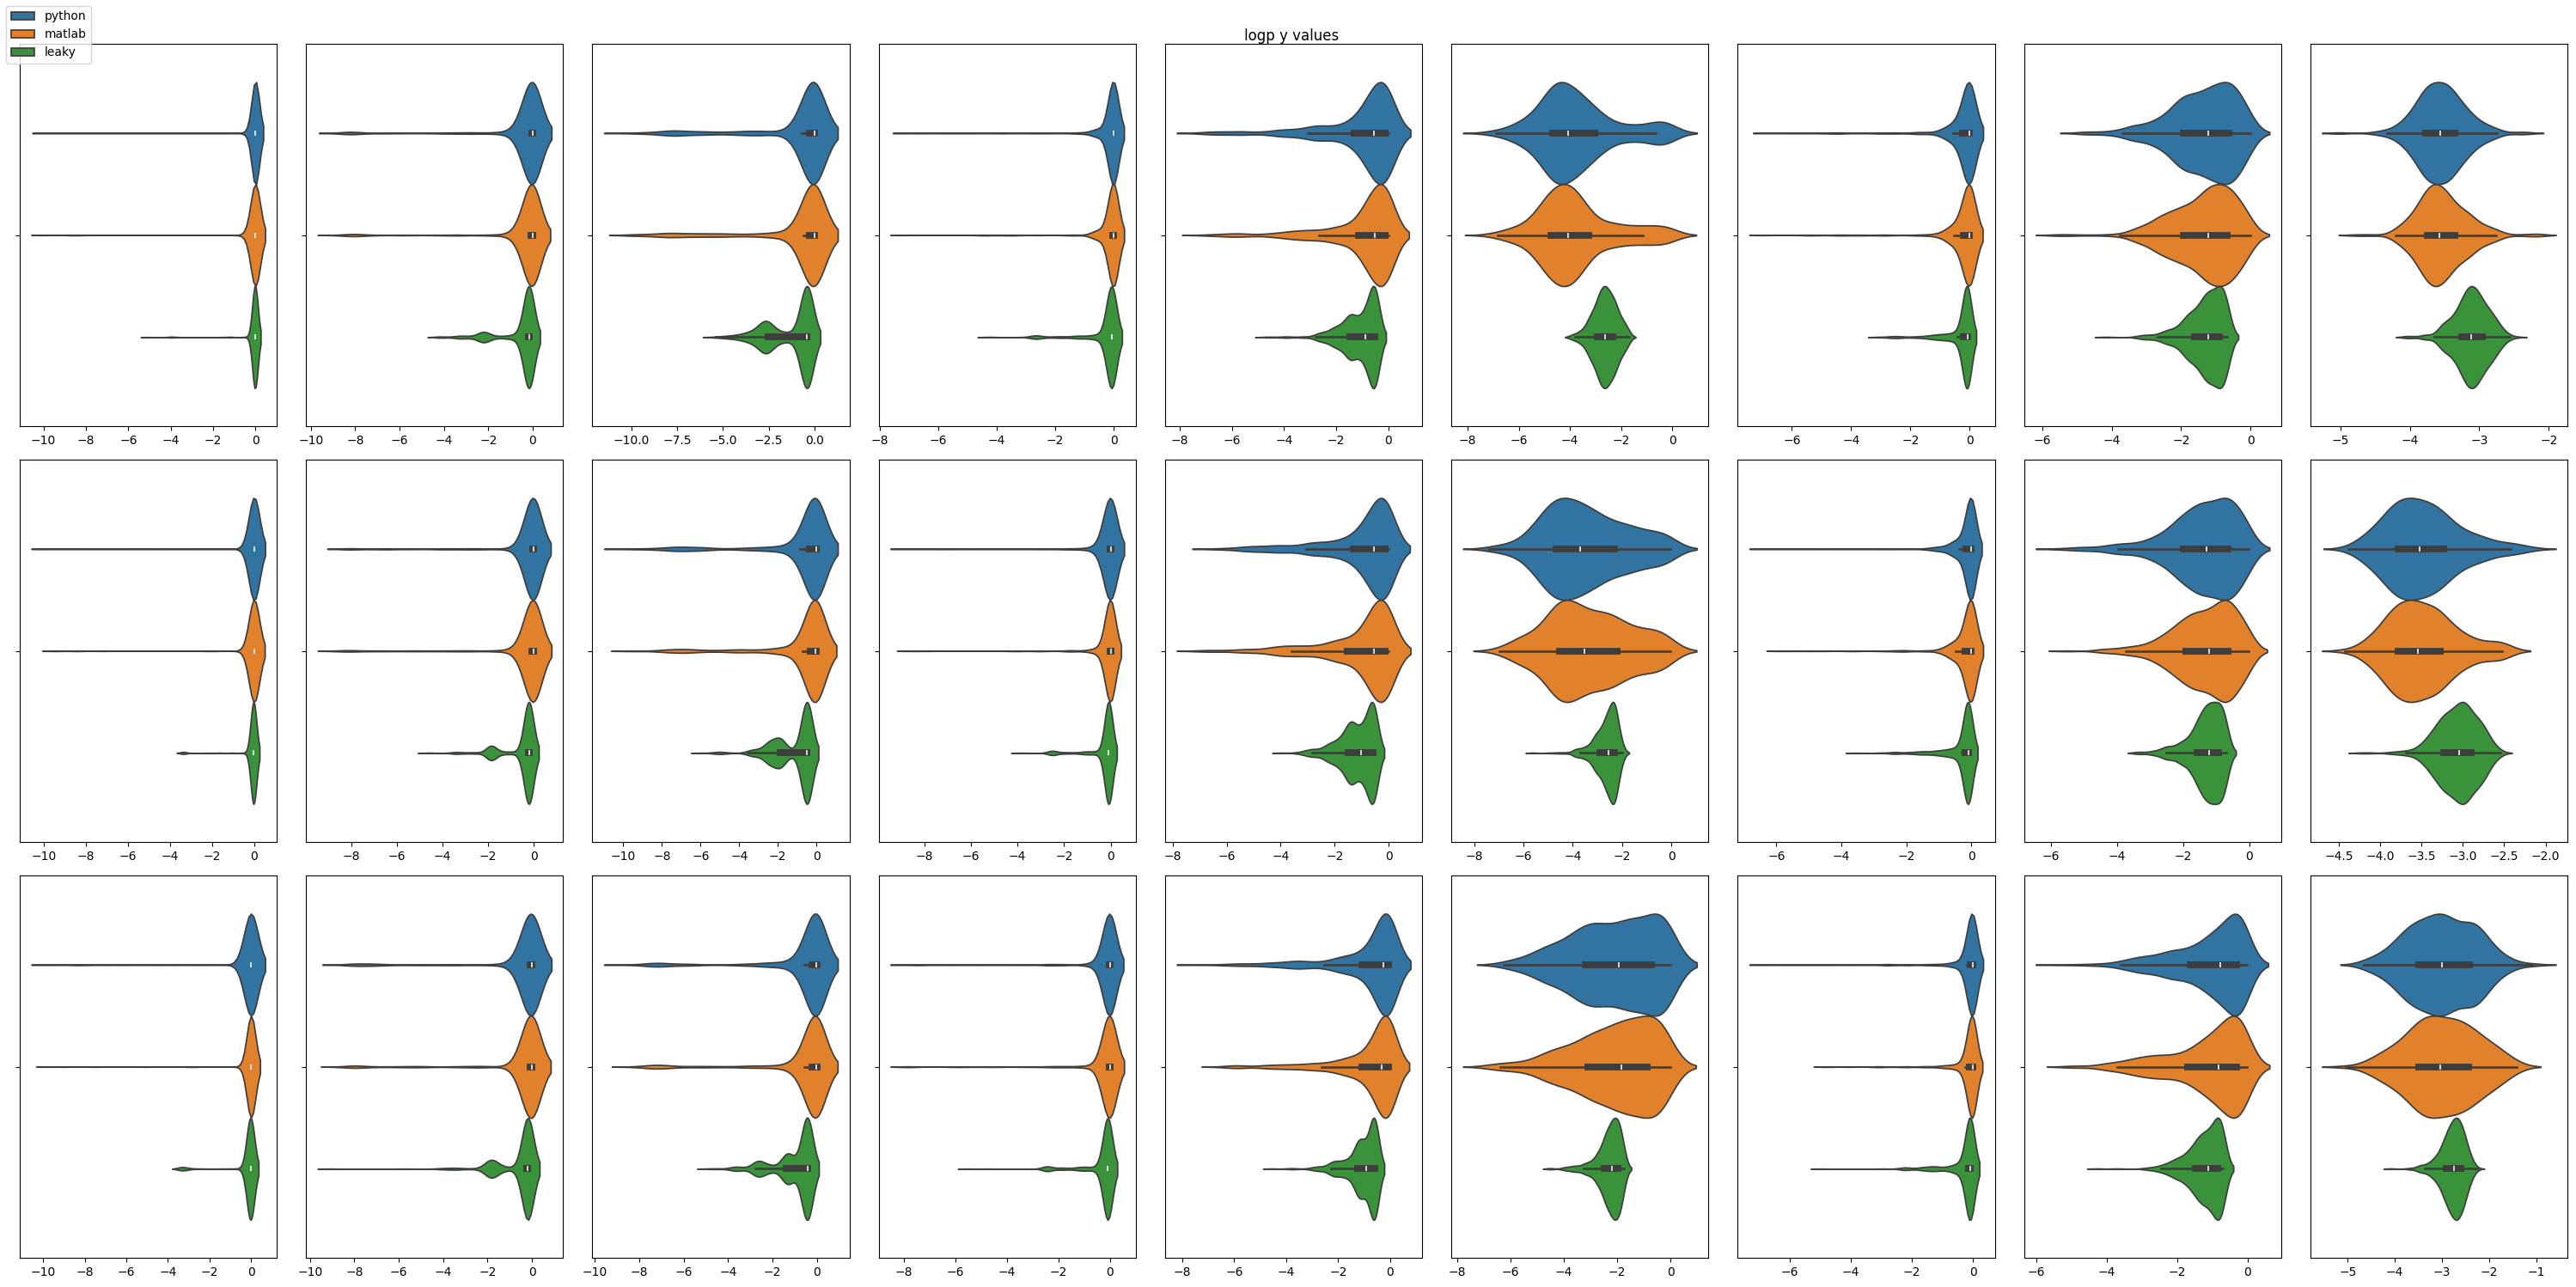

In [31]:
# Logp c (context)
krows = 3
fig, axs = plt.subplots(krows, len(data.keys())//krows, figsize=(30, 15))
for i in range(len(df_logpy_.config.unique())):
    # sns.histplot(data=df_logpy_[df_logpy_['config']==i], x='logpy', ax=axs.flatten()[i], kde=True, hue='model')
    sns.violinplot(data=df_logpc_[df_logpc_['config']==i], x='logpc', ax=axs.flatten()[i], hue='model', log_scale=False)
    if i == 0: 
        handles, labels = axs.flatten()[i].get_legend_handles_labels()
        axs.flatten()[i].get_legend().remove()
        fig.legend(handles, labels, loc='upper left')
    else: axs.flatten()[i].get_legend().remove()
    axs.flatten()[i].set_xlabel('')
fig.suptitle('logp y values')
plt.tight_layout()

In [32]:
data[17]

{'gamma_t': np.float64(10.0),
 'alpha_t': np.float64(10.0),
 'rho_t': np.float64(0.5),
 'ctx_count': 44,
 'Python': {'time': 765.1960247516632,
  'logp_y_avg': array([-3.93004529e-01, -8.19753181e-01, -2.00795632e+00, -1.08979041e+00,
         -1.33214996e+00, -7.07612699e-01, -4.79527947e-01, -9.09158930e-01,
         -6.85963912e-01, -6.09731769e-01, -8.60536817e-01, -8.49855010e-01,
         -1.33240593e+00, -9.08915887e-01, -7.99382016e-01, -8.48462430e-01,
         -2.34506599e-01, -8.53410604e-01, -8.42135276e-01, -5.84192804e-01,
         -9.04437715e-01, -1.24940629e+00, -4.58604981e-01, -1.02997178e+00,
         -9.35156038e-01, -1.00263746e+00, -9.01556490e-01, -6.49746546e-01,
         -7.07177988e-01, -6.92717038e-01, -7.44474559e-01, -6.40816521e-01,
         -1.39476245e+00, -9.97227690e-01, -9.37983262e-01, -9.86968716e-01,
         -6.79966170e-01, -1.00357306e+00, -3.56498819e-01, -8.48155822e-01,
         -6.57232341e-01, -8.74762311e-01, -3.36454888e-01, -8.17644077e

In [ ]:
# Time on some config
# collect the MSE
# Add parallel processing in the hyperconfig scan
# Viz of the differences between leaky and COIN (distr, heatmap of the differences)
# Figure for Python Vs Matlab (also logp c) 
# --> post on github (include the values of the configs params) (include a Readme, include a note about timing on some hyperparametrization) ... also remove comments and clean code